# 기본설정

In [97]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터전처리

In [3]:
import pandas as pd

inwon = pd.read_csv('C:/Users/user/Desktop/데이터/압축푼데이터/서울버스 일별 시간대별 승하차 인원.csv', encoding='euc-kr')
inwon2 = pd.read_csv('C:/Users/user/Desktop/데이터/압축푼데이터/서울철도 일별 시간대별 승하차 인원.csv', encoding='euc-kr')

In [4]:
inwon

,운행일자,노선ID,노선,정류장ID,정류장,승차시간구분,시간구분ID,승차총승객수,하차총승객수
0,2014-12-01,11110329,6411번(구로동~개포동),9009281,신트리아파트,19:00:00~19:59:59,30,6,4
1,2014-08-15,11110556,7730번(은평공영차고지~이북오도청),9001990,월곡동두산아파트,13:00:00~13:59:59,0,6,0
2,2015-06-05,11110677,2312번(중랑공영차고지~강동공영차고지),8501523,경문고등학교,19:00:00~19:59:59,30,1,14
3,2015-04-12,11110899,670번(온수동~디지털미디어시티역),9000198,성내주유소,23:00:00~23:59:59,0,19,1
4,2015-03-19,11110323,240번(중랑공영차고지~신사역사거리),9001139,중앙동성당앞,11:00:00~11:59:59,30,1,2
...,...,...,...,...,...,...,...,...,...
495,2015-10-08,11110359,1127번(도봉동~도봉동),14449,정부과천청사,13:00:00~13:59:59,30,0,1
496,2014-08-26,11110979,7720번(구산동~신촌),70063,세탁소,12:00:00~12:59:59,30,0,0
497,2014-11-04,11110415,7738번(은평공영차고지~홍제역),9000853,한전병원,06:00:00~06:59:59,0,12,0
498,2015-05-19,11110982,동작02(사자암~노량진역),9009299,새마을시장,12:00:00~12:59:59,0,9,0


In [ ]:
# 변환 함수 정의
def convert_time_code(time_str):
    # 문자열의 앞 두 자리를 정수로 변환
    return int(time_str[:2])

# 승차시간구분 컬럼 변환 적용
inwon['승차시간구분'] = inwon['승차시간구분'].apply(convert_time_code)

           운행일자      노선ID                      노선    정류장ID       정류장  승차시간구분  \
0    2014-12-01  11110329          6411번(구로동~개포동)  9009281    신트리아파트      19   
1    2014-08-15  11110556    7730번(은평공영차고지~이북오도청)  9001990  월곡동두산아파트      13   
2    2015-06-05  11110677  2312번(중랑공영차고지~강동공영차고지)  8501523    경문고등학교      19   
3    2015-04-12  11110899     670번(온수동~디지털미디어시티역)  9000198     성내주유소      23   
4    2015-03-19  11110323    240번(중랑공영차고지~신사역사거리)  9001139    중앙동성당앞      11   
..          ...       ...                     ...      ...       ...     ...   
495  2015-10-08  11110359          1127번(도봉동~도봉동)    14449    정부과천청사      13   
496  2014-08-26  11110979           7720번(구산동~신촌)    70063       세탁소      12   
497  2014-11-04  11110415      7738번(은평공영차고지~홍제역)  9000853      한전병원       6   
498  2015-05-19  11110982          동작02(사자암~노량진역)  9009299     새마을시장      12   
499  2014-04-10  11110520         금천11(산기슭공원~석수역)  9010038  봉영여중.목동고      22   

     시간구분ID  승차총승객수  하차총승객수  
0        

In [8]:
# 변환 함수 정의
def convert_time_code(time_str):
    # 문자열의 앞 두 자리를 정수로 변환
    return int(time_str[:2])

# 승차시간구분 컬럼 변환 적용
inwon2['승차시간구분'] = inwon2['승차시간구분'].apply(convert_time_code)

In [9]:
inwon3 = inwon[['승차시간구분','승차총승객수','하차총승객수']]

In [10]:
inwon4 = inwon2[['승차시간구분','승차총승객수','하차총승객수']]

In [12]:
combined_inwon = pd.concat([inwon3, inwon4], axis=0).reset_index(drop=True)

combined_inwon

,승차시간구분,승차총승객수,하차총승객수
0,19,6,4
1,13,6,0
2,19,1,14
3,23,19,1
4,11,1,2
...,...,...,...
995,22,190,69
996,17,115,214
997,6,25,79
998,17,316,321


In [13]:
grouped_data = combined_inwon.groupby('승차시간구분')[['승차총승객수', '하차총승객수']].sum().reset_index()

grouped_data

,승차시간구분,승차총승객수,하차총승객수
0,0,500,2150
1,1,0,7
2,2,17,4
3,3,8,13
4,4,18,25
5,5,3589,875
6,6,2984,4200
7,7,17490,11445
8,8,19966,24346
9,9,8407,6354


In [20]:
nalssi = pd.read_csv('C:/Users/user/Desktop/데이터/압축푼데이터/OBS_ASOS_TIM_20250104050402.csv', encoding='euc-kr')

In [21]:
nalssi

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,108,서울,2013-01-01 01:00,-8.5,NaN,4.0,57.0,6.4
1,108,서울,2013-01-01 02:00,-8.4,NaN,4.0,60.0,6.4
2,108,서울,2013-01-01 03:00,-8.1,NaN,3.4,58.0,6.4
3,108,서울,2013-01-01 04:00,-8.2,NaN,3.8,58.0,6.4
4,108,서울,2013-01-01 05:00,-8.2,NaN,4.4,61.0,6.4
...,...,...,...,...,...,...,...,...
8731,108,서울,2013-12-30 20:00,3.4,NaN,3.1,52.0,NaN
8732,108,서울,2013-12-30 21:00,3.0,NaN,2.6,54.0,NaN
8733,108,서울,2013-12-30 22:00,2.5,NaN,1.8,56.0,NaN
8734,108,서울,2013-12-30 23:00,2.1,NaN,1.9,57.0,NaN


In [22]:
# 변환 함수 정의
def convert_time_code(time_str):
    # 문자열의 앞 두 자리를 정수로 변환
    return int(time_str[-5:-3])

# 승차시간구분 컬럼 변환 적용
nalssi['일시'] = nalssi['일시'].apply(convert_time_code)

In [23]:
nalssi

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,108,서울,1,-8.5,NaN,4.0,57.0,6.4
1,108,서울,2,-8.4,NaN,4.0,60.0,6.4
2,108,서울,3,-8.1,NaN,3.4,58.0,6.4
3,108,서울,4,-8.2,NaN,3.8,58.0,6.4
4,108,서울,5,-8.2,NaN,4.4,61.0,6.4
...,...,...,...,...,...,...,...,...
8731,108,서울,20,3.4,NaN,3.1,52.0,NaN
8732,108,서울,21,3.0,NaN,2.6,54.0,NaN
8733,108,서울,22,2.5,NaN,1.8,56.0,NaN
8734,108,서울,23,2.1,NaN,1.9,57.0,NaN


In [24]:
grouped_nalssi = nalssi.groupby('일시')[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']].mean().reset_index()

grouped_nalssi

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,0,11.357967,1.486957,2.331868,65.324176,5.877083
1,1,10.988736,2.092000,2.210714,66.420604,6.494444
2,2,10.701099,2.488462,2.151648,67.561264,6.569444
3,3,10.400824,1.849091,2.140659,68.873626,5.952000
4,4,10.150824,1.728125,2.125549,69.615385,6.000000
5,5,9.909341,1.328205,2.154121,70.848901,5.929412
6,6,9.737363,1.648387,2.173352,71.609890,5.964706
7,7,9.788187,1.595000,2.260714,71.032967,6.033333
8,8,10.300824,1.584211,2.378022,68.206044,6.050980
9,9,11.300275,1.978571,2.531319,63.637363,6.037255


In [25]:
merged_data = pd.merge(grouped_data, grouped_nalssi, left_on='승차시간구분', right_on='일시', how='inner')

In [28]:
merged_data['승하차총승객수'] = merged_data['승차총승객수'] + merged_data['하차총승객수']
merged_data2 = merged_data[['승차시간구분','승하차총승객수','기온(°C)','강수량(mm)','풍속(m/s)','습도(%)','적설(cm)']]
merged_data2

,승차시간구분,승하차총승객수,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,0,2650,11.357967,1.486957,2.331868,65.324176,5.877083
1,1,7,10.988736,2.092000,2.210714,66.420604,6.494444
2,2,21,10.701099,2.488462,2.151648,67.561264,6.569444
3,3,21,10.400824,1.849091,2.140659,68.873626,5.952000
4,4,43,10.150824,1.728125,2.125549,69.615385,6.000000
5,5,4464,9.909341,1.328205,2.154121,70.848901,5.929412
6,6,7184,9.737363,1.648387,2.173352,71.609890,5.964706
7,7,28935,9.788187,1.595000,2.260714,71.032967,6.033333
8,8,44312,10.300824,1.584211,2.378022,68.206044,6.050980
9,9,14761,11.300275,1.978571,2.531319,63.637363,6.037255


In [82]:
merged_data2.columns

Index(['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)'], dtype='object')

In [83]:
result_data2 = merged_data2[['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']]

In [84]:
result_data2.to_csv('C:/Users/user/Desktop/데이터/결과데이터/result.csv',index=False,encoding='utf-8-sig')

In [85]:
result_data2.columns

Index(['승차시간구분', '승하차총승객수', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)'], dtype='object')

In [86]:
result_data2 

,승차시간구분,승하차총승객수,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm)
0,0,2650,11.357967,1.486957,2.331868,65.324176,5.877083
1,1,7,10.988736,2.092000,2.210714,66.420604,6.494444
2,2,21,10.701099,2.488462,2.151648,67.561264,6.569444
3,3,21,10.400824,1.849091,2.140659,68.873626,5.952000
4,4,43,10.150824,1.728125,2.125549,69.615385,6.000000
5,5,4464,9.909341,1.328205,2.154121,70.848901,5.929412
6,6,7184,9.737363,1.648387,2.173352,71.609890,5.964706
7,7,28935,9.788187,1.595000,2.260714,71.032967,6.033333
8,8,44312,10.300824,1.584211,2.378022,68.206044,6.050980
9,9,14761,11.300275,1.978571,2.531319,63.637363,6.037255


# 출퇴근 시간 vs. 비출퇴근 시간의 기상 데이터가 차이나는 지 확인(T-검정)

In [ ]:
from scipy.stats import ttest_ind

# 출퇴근 시간 구분 (6~9시, 18~21시)
result_data2['출퇴근구분'] = result_data2['승차시간구분'].apply(
    lambda x: '출퇴근시간' if (6 <= x <= 9 or 18 <= x <= 21) else '비출퇴근시간'
)

# 출퇴근 시간 vs 비출퇴근 시간의 기상 데이터 평균 비교 (기온, 강수량, 풍속, 습도, 적설)
weather_columns = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']

# 각 기상 변수에 대해 출퇴근과 비출퇴근 시간 비교
weather_ttest_results = {}

for var in weather_columns:
    commute_weather = result_data2[result_data2['출퇴근구분'] == '출퇴근시간'][var]
    non_commute_weather = result_data2[result_data2['출퇴근구분'] == '비출퇴근시간'][var]
    t_stat, p_val = ttest_ind(commute_weather, non_commute_weather, equal_var=False)
    weather_ttest_results[var] = {'T-statistic': t_stat, 'p-value': p_val}

# 결과를 데이터프레임으로 정리
weather_ttest_results_df = pd.DataFrame(weather_ttest_results).T



In [ ]:
weather_ttest_results_df

,T-statistic,p-value
기온(°C),-1.209785,0.242697
강수량(mm),-0.033880,0.973477
풍속(m/s),-0.272756,0.788298
습도(%),1.238088,0.231578
적설(cm),-1.684788,0.106228


* 기온, 강수량, 풍속, 습도, 적설 모두 p-value>0.05 이므로, 출퇴근 시간과 비출퇴근 시간간은 결과를 내는 것에 있어서 차이가 없다.

# 상관분석으로 인사이트 도출하기

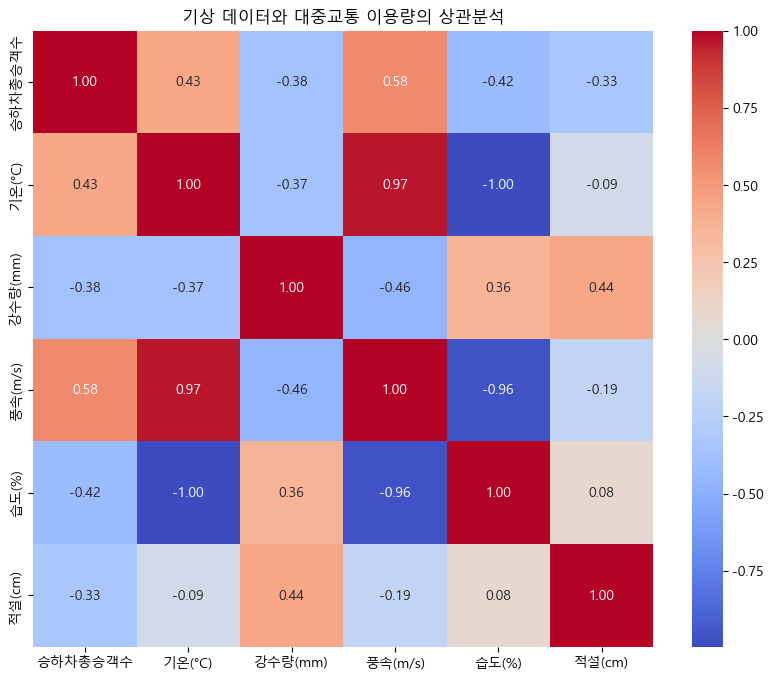

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# 대중교통 이용량 (승하차총승객수)와 기상 데이터만 선택
weather_columns = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)']
df_weather = result_data2[['승하차총승객수'] + weather_columns]

# 상관계수 계산
correlation_matrix = df_weather.corr()

# 상관계수 시각화 - 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("기상 데이터와 대중교통 이용량의 상관분석")
plt.show()

* 상관분석만의 인사이트

    : 기온이 높을 수록 대중교통 이용량이 증가한다.

    : 강수량, 습도, 적설량이 많아질수록 대중교통 이용량이 감소한다.

    : 바람이 많이 불수록 대중교통 이용량이 증가한다.


# p-value를 활용한 검증[피어슨 상관계수(연속형 변수)]

In [110]:
from scipy.stats import pearsonr

# 피어슨 상관계수 및 p-value 계산
pvalue_results = {}
for var in ['기온(°C)', '강수량(mm)', '습도(%)', '풍속(m/s)', '적설(cm)']:
    corr, pval = pearsonr(result_data2[var], result_data2['승하차총승객수'])
    pvalue_results[var] = {'Correlation': corr, 'p-value': pval}

# 결과를 데이터프레임으로 정리
pvalue_results_df = pd.DataFrame(pvalue_results).T

In [111]:
pvalue_results_df

,Correlation,p-value
기온(°C),0.425496,0.038180
강수량(mm),-0.378150,0.068457
습도(%),-0.418520,0.041812
풍속(m/s),0.577800,0.003107
적설(cm),-0.332083,0.112877


- 기온, 습도, 풍속은 유의미한 변수(p-value<0.05)이고 강수량, 적설은 유의미하지 않는 변수(p-value>=0.05)이다. 

* 최종결론

    : 기온이 높을 수록 대중교통 이용량이 증가한다.

    : 습도가 높을 수록 대중교통 이용량이 감소한다.

    : 바람이 많이 불수록 대중교통 이용량이 증가한다.

    : 강수량, 적설량으로는 대중교통 이용량의 추세는 알 수가 없다.